In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import attila_utils

## Summary statistics

In [2]:
fpath = '../../resources/cell-based-assays/CO28151_outcome summary.xlsx'
sheet_name = 'CO28151'
CO28151 = pd.read_excel(fpath, sheet_name=sheet_name)

fpath = '../../resources/cell-based-assays/CO28151_outcome-summary_27062023-clean.xlsx'
sheet_name = 'CO28151'
CO28151_27062023 = pd.read_excel(fpath, sheet_name=sheet_name)

sheet_name = 'CO25360'
CO25360_27062023 = pd.read_excel(fpath, sheet_name=sheet_name)

### Assays

Assays in CO28151 before 2023 June 27

In [3]:
print(len(CO28151.assay.unique()), 'assays')
list(CO28151.assay.unique())

11 assays


['Abeta celarance supernatant',
 'Abeta celarance intracellular',
 'growth factor removal MTT',
 'growth factor removal LDH',
 'Abeta secretion 1-42',
 'Abeta secretion 1-40',
 'LPS inflammation TNFa',
 'LPS inflammation IL1b',
 'LPS inflammation IL6',
 'LPS inflammation KC/GRO',
 'LPS inflammation MTT']

Assays in CO28151 after 2023 June 27

In [4]:
print(len(CO28151_27062023.assay.unique()), 'assays')
list(CO28151_27062023.assay.unique())

14 assays


['Abeta celarance intracellular',
 'Abeta celarance supernatant',
 'Abeta secretion 1-40',
 'Abeta secretion 1-42',
 'growth factor removal LDH',
 'growth factor removal MTT',
 'LPS inflammation IL1b',
 'LPS inflammation IL6',
 'LPS inflammation KC/GRO',
 'LPS inflammation MTT',
 'LPS inflammation TNFa',
 'pTau 231',
 'pTau 231 vs total Tau',
 'Total Tau']

Assays in CO28151 added on 2023 June 27

In [5]:
set(CO28151_27062023.assay.unique()).difference(set(CO28151.assay.unique()))

{'Total Tau', 'pTau 231', 'pTau 231 vs total Tau'}

The same set of assays are contained in CO25360 as in CO28151

In [6]:
set(CO28151_27062023.assay.unique()) == set(CO25360_27062023.assay.unique())

True

### Treatments

Treatments in CO28151 before 2023 June 27

In [7]:
print(len(CO28151.TI.unique()), 'treatments')
treatments_CO28151 = pd.DataFrame(*[CO28151.groupby(['TI', 'name']).first().index.get_level_values(i) for i in [1, 0]])
treatments_CO28151

13 treatments


,name
TI,
TI1,Amiloride
TI11,DIM-C-pPhOCH3
TI12,C-DIM12
TI13,Liraglutide
TI14,Semaglutide
TI2,Phenamil methanesulfonate salt
TI3,Benzamil hydrochloride hydrate
TI4,"5-(N,N-Dimethyl)amiloride hydrochloride"
TI5,5-(N-Ethyl-N-isopropyl)amiloride


Treatments in CO28151 after on 2023 June 27

In [8]:
print(len(CO28151_27062023.TI.unique()), 'treatments')
treatments_CO28151_27062023 = pd.DataFrame(*[CO28151_27062023.groupby(['TI', 'name']).first().index.get_level_values(i) for i in [1, 0]])
treatments_CO28151_27062023

17 treatments


,name
TI,
TI1,Amiloride
TI10,Cilostazol
TI11,DIM-C-pPhOCH3
TI12,C-DIM12
TI13,Liraglutide
TI14,Semaglutide
TI15,Hydroxychloroquine racemic
TI16/17,"(S)Hydroxychloroquine racemic, free base"
TI18/19,"(R)Hydroxychloroquine racemic, free base"


Treatments in CO28151 added on 2023 June 27

In [9]:
treatments_CO28151_27062023.loc[list(set(treatments_CO28151_27062023.index).difference(set(treatments_CO28151.index)))]

,name
TI,
TI15,Hydroxychloroquine racemic
TI18/19,"(R)Hydroxychloroquine racemic, free base"
TI10,Cilostazol
TI16/17,"(S)Hydroxychloroquine racemic, free base"


Treatments in CO25360

In [10]:
print(len(CO25360_27062023.TI.unique()), 'treatments')
treatments_CO25360_27062023 = pd.DataFrame(*[CO25360_27062023.groupby(['TI', 'name']).first().index.get_level_values(i) for i in [1, 0]])
treatments_CO25360_27062023

27 treatments


,name
TI,
TI1,VALPROIC ACID
TI10,DASATINIB
TI11,FLUTICASONE
TI12,METHOTREXATE
TI13,HYDROXYCHLOROQUINE
TI14,ROFLUMILAST
TI15,NAPABUCASIN
TI16,CRIZOTINIB
TI17,C188-9


In [11]:
# concatenate the two studies
datasum = pd.concat([CO28151_27062023, CO25360_27062023], axis=0)
datasum = datasum.groupby(['name', 'assay']).first()['Mean Diff,'].unstack()
assay_pretty_names = {
    'Abeta celarance intracellular': 'Aβ42 clearance: Lys',
    'Abeta celarance supernatant': 'Aβ42 clearance: SN',
    'Abeta secretion 1-40': 'Aβ secretion: Aβ40',
    'Abeta secretion 1-42': 'Aβ secretion: Aβ42',
    'LPS inflammation IL1b': 'LPS inflammation: IL-1β',
    'LPS inflammation IL6': 'LPS inflammation: IL-6',
    'LPS inflammation KC/GRO': 'LPS inflammation: KC/GRO',
    'LPS inflammation MTT': 'LPS inflammation: MTT',
    'LPS inflammation TNFa': 'LPS inflammation: TNFα',
    'Total Tau': 'Tau phoshorylation: total Tau',
    'growth factor removal LDH': 'Growt factor withdrawal: LDH',
    'growth factor removal MTT': 'Growth factor withdrawal: MTT',
    'pTau 231': 'Tau phoshorylation: pTau (T231)',
    'pTau 231 vs total Tau': 'Tau phoshorylation: pT/T ratio',
}
datasum = datasum.rename(assay_pretty_names, axis=1)
datasum

assay,Aβ42 clearance: Lys,Aβ42 clearance: SN,Aβ secretion: Aβ40,Aβ secretion: Aβ42,LPS inflammation: IL-1β,LPS inflammation: IL-6,LPS inflammation: KC/GRO,LPS inflammation: MTT,LPS inflammation: TNFα,Tau phoshorylation: total Tau,Growt factor withdrawal: LDH,Growth factor withdrawal: MTT,Tau phoshorylation: pTau (T231),Tau phoshorylation: pT/T ratio
name,,,,,,,,,,,,,,
"(R)Hydroxychloroquine racemic, free base",-1.52100,13263.00,NaN,NaN,0.26110,278.1,0.09900,-4.333,99.60,NaN,NaN,NaN,NaN,NaN
"(S)Hydroxychloroquine racemic, free base",0.55500,715.80,NaN,NaN,0.23420,-2188.0,-1.05700,-3.500,43.60,NaN,NaN,NaN,NaN,NaN
"3,3'-Diindolylmethane",-7719.00000,4470.00,2216.00,226.20,-0.63800,233.0,3.88000,-0.517,204.00,-23828.0,-1.430,17.600,4.5000,0.07500
"5-(N,N-Dimethyl)amiloride hydrochloride",-0.59670,11579.00,1254891.00,70028.00,0.39330,14321.0,6.19700,96.500,1318.00,NaN,-36.330,38.670,NaN,NaN
"5-(N,N-Hexamethylene)amiloride",-1.81800,6853.00,-21838.00,-38713.00,1.32200,19211.0,9.16800,61.670,1385.00,NaN,-41.670,61.170,NaN,NaN
5-(N-Ethyl-N-isopropyl)amiloride,-3.17700,12536.00,957888.00,60425.00,1.28100,14353.0,8.40100,97.500,1384.00,NaN,-43.830,59.500,NaN,NaN
5-(N-Methyl-N-isobutyl)amiloride,-0.58500,8891.00,965683.00,60805.00,1.13200,19356.0,9.99200,77.170,1647.00,NaN,-45.670,60.000,NaN,NaN
A-317567,-1.44000,68649.00,NaN,NaN,0.45010,8922.0,4.04300,97.330,1394.00,NaN,-50.170,54.330,NaN,NaN
ACITRETIN,0.14200,-32.10,-1662.00,-218.00,-0.17800,83.3,-3.54000,46.700,-1371.00,-80305.0,-4.930,19.900,1.6700,2.21000


In [12]:
print(datasum.shape[0], 'treatments')
print(datasum.shape[1], 'assays')
print(datasum.shape[0], '*', datasum.shape[1], '=', datasum.shape[0] * datasum.shape[1], 'treatment-assay combinations')
print(datasum.isna().sum().sum(), '(', np.round(100 * datasum.isna().sum().sum() / 616), '% )', 'unmeasured combinations')

44 treatments
14 assays
44 * 14 = 616 treatment-assay combinations
72 ( 12.0 % ) unmeasured combinations


## Older 

## Raw data

This function was used to conver wide-formatted data on sheet `GF withdrawal 0` to long-formatted data on sheet `GF withdrawal`.

In [13]:
def wide2long_form(batch, plate, assay):
    df = pd.read_clipboard()
    activity = df.stack().to_frame('Activity')
    batch = pd.DataFrame({'Batch': batch}, index=activity.index)
    plate = pd.DataFrame({'Plate': plate}, index=activity.index)
    assay = pd.DataFrame({'Assay': assay}, index=activity.index)
    middle = df.stack().index.to_frame().rename({0: 'Replica', 1: 'TI_conc'}, axis=1)
    TI = middle.TI_conc.apply(lambda s: re.sub('^(TI[0-9]{1,2}).*$', '\\1', s)).to_frame('TI')
    conc = middle.TI_conc.apply(lambda s: re.match('.*c[0-9]{1,2}$', s))
    conc = conc.apply(lambda x: re.sub('^(TI[0-1]{1,2}\\s+)(c[0-9]{1,2})$', '\\2', x.string) if x is not None else '').to_frame('conc')
    l = [batch, plate, TI, conc, assay, activity]
    long = pd.concat(l, axis=1)
    long.to_clipboard(index=False, header=False)
    return(long)

In [14]:
fpath = '../../resources/cell-based-assays/CO28151_data-summary-clean.xlsx'
data = dict()
key = 'Abeta Clearance'
df = pd.read_excel(fpath, sheet_name=key)
df = df[['Batch', 'Plate', 'TI', 'conc', 'Aβ42 SN', 'Aβ42 Lys']]
df = df.melt(id_vars=['Batch', 'Plate', 'TI', 'conc'], var_name='Assay', value_name='Activity')
df['Assay_pretty'] = df.Assay.apply(lambda x: {'Aβ42 Lys': 'Aβ42 clearance: Lys', 'Aβ42 SN': 'Aβ42 clearance: SN'}[x])
data['Aβ42 clearance'] = df
data['Aβ42 clearance']

,Batch,Plate,TI,conc,Assay,Activity,Assay_pretty
0,NaN,1.0,TI2,c1,Aβ42 SN,35.0,Aβ42 clearance: SN
1,NaN,1.0,TI2,c1,Aβ42 SN,102.0,Aβ42 clearance: SN
2,NaN,1.0,TI2,c1,Aβ42 SN,51.0,Aβ42 clearance: SN
3,NaN,1.0,TI2,c1,Aβ42 SN,37.0,Aβ42 clearance: SN
4,NaN,1.0,TI2,c1,Aβ42 SN,55.0,Aβ42 clearance: SN
...,...,...,...,...,...,...,...
605,NaN,1.0,VC_1,NaN,Aβ42 Lys,3023.0,Aβ42 clearance: Lys
606,NaN,2.0,VC_2,NaN,Aβ42 Lys,1492.0,Aβ42 clearance: Lys
607,NaN,2.0,VC_2,NaN,Aβ42 Lys,456.0,Aβ42 clearance: Lys
608,NaN,2.0,VC_2,NaN,Aβ42 Lys,195.0,Aβ42 clearance: Lys


In [15]:
key = 'Abeta secretion'
df = pd.read_excel(fpath, sheet_name=key)
df = pd.melt(df, id_vars=['Batch', 'Plate', 'TI', 'conc'], value_vars=['Aβ38', 'Aβ40', 'Aβ42'], var_name='Assay', value_name='Activity')
df['Assay_pretty'] = df.Assay.apply(lambda x: {'Aβ38': 'Aβ secretion: Aβ38', 'Aβ40': 'Aβ secretion: Aβ40', 'Aβ42': 'Aβ secretion: Aβ42'}[x])
data['Aβ secretion'] = df
data['Aβ secretion']

,Batch,Plate,TI,conc,Assay,Activity,Assay_pretty
0,NaN,1,TI2,c1,Aβ38,4010.0000,Aβ secretion: Aβ38
1,NaN,1,TI2,c1,Aβ38,6280.0000,Aβ secretion: Aβ38
2,NaN,1,TI2,c1,Aβ38,27790.0000,Aβ secretion: Aβ38
3,NaN,1,TI2,c1,Aβ38,32560.0000,Aβ secretion: Aβ38
4,NaN,1,TI2,c1,Aβ38,20670.0000,Aβ secretion: Aβ38
...,...,...,...,...,...,...,...
841,NaN,5,TI15,c3,Aβ42,979.6982,Aβ secretion: Aβ42
842,NaN,5,TI15,c3,Aβ42,1072.2790,Aβ secretion: Aβ42
843,NaN,5,TI15,c3,Aβ42,1086.8330,Aβ secretion: Aβ42
844,NaN,5,TI15,c3,Aβ42,1070.6570,Aβ secretion: Aβ42


In [16]:
key = 'GF withdrawal'
df = pd.read_excel(fpath, sheet_name=key)
df['Assay_pretty'] = df.Assay.apply(lambda a: 'Growth factor withdrawal: ' + a)
data['Growth factor withdrawal'] = df
data['Growth factor withdrawal']

,Batch,Plate,TI,conc,Assay,Activity,Assay_pretty
0,1,1,TI1,c1,MTT,0.180,Growth factor withdrawal: MTT
1,1,1,TI1,c1,MTT,0.185,Growth factor withdrawal: MTT
2,1,1,TI1,c1,MTT,0.196,Growth factor withdrawal: MTT
3,1,1,RI,NaN,MTT,0.306,Growth factor withdrawal: MTT
4,1,1,VC,NaN,MTT,0.206,Growth factor withdrawal: MTT
...,...,...,...,...,...,...,...
727,2,1,VC,NaN,LDH,0.084,Growth factor withdrawal: LDH
728,2,1,RI,NaN,LDH,0.067,Growth factor withdrawal: LDH
729,2,1,TI15,TI15 c1,LDH,0.108,Growth factor withdrawal: LDH
730,2,1,TI15,TI15 c2,LDH,0.084,Growth factor withdrawal: LDH


In [17]:
key = 'LPS inflammation'
df = pd.read_excel(fpath, sheet_name=key)
assay_names = ['IL-10', 'IL-1β', 'IL-6', 'KC/GRO', 'TNF-α']
df = pd.melt(df, id_vars=['Batch', 'Plate', 'TI', 'conc'], value_vars=assay_names, var_name='Assay', value_name='Activity')
df['Assay_pretty'] = df.Assay.apply(lambda x: {a: 'LPS inflammation: ' + a for a in assay_names}[x])
data['LPS inflammation'] = df
data['LPS inflammation']

,Batch,Plate,TI,conc,Assay,Activity,Assay_pretty
0,NaN,1,TI2,c1,IL-10,1.46,LPS inflammation: IL-10
1,NaN,1,TI2,c1,IL-10,3.23,LPS inflammation: IL-10
2,NaN,1,TI2,c1,IL-10,2.81,LPS inflammation: IL-10
3,NaN,1,TI2,c1,IL-10,2.57,LPS inflammation: IL-10
4,NaN,1,TI2,c1,IL-10,3.15,LPS inflammation: IL-10
...,...,...,...,...,...,...,...
2185,NaN,4,VC 4,c4,TNF-α,15.0,LPS inflammation: TNF-α
2186,NaN,4,VC 4,c4,TNF-α,18.0,LPS inflammation: TNF-α
2187,NaN,4,VC 4,c4,TNF-α,13.0,LPS inflammation: TNF-α
2188,NaN,4,VC 4,c4,TNF-α,19.0,LPS inflammation: TNF-α


In [18]:
key = 'Tau phosphorylation'
df = pd.read_excel(fpath, sheet_name=key)
df = df.rename({'Tau  [pg/µg]': 'Tau', 'pTau (T231) [AU2]': 'pTau (T231)', 'Ratio pTau /Tau': 'pT/T ratio'}, axis=1)
#assay_names = ['Tau [pg/µg]', 'pTau (T231) [AU2]', 'Ratio pTau /Tau']
assay_names = ['Tau', 'pTau (T231)', 'pT/T ratio']
df = pd.melt(df, id_vars=['Batch', 'Plate', 'TI', 'conc'], value_vars=assay_names, var_name='Assay', value_name='Activity')
df['Assay_pretty'] = df.Assay.apply(lambda x: {a: 'Tau phoshorylation: ' + a for a in assay_names}[x])
data['Tau phoshorylation'] = df
data['Tau phoshorylation']

,Batch,Plate,TI,conc,Assay,Activity,Assay_pretty
0,batch 1,Plate 5,TI1,c1,Tau,2.1,Tau phoshorylation: Tau
1,batch 1,Plate 5,TI1,c1,Tau,1.7,Tau phoshorylation: Tau
2,batch 1,Plate 5,TI1,c1,Tau,2.1,Tau phoshorylation: Tau
3,batch 1,Plate 5,TI1,c1,Tau,2.1,Tau phoshorylation: Tau
4,batch 1,Plate 5,TI1,c1,Tau,1.0,Tau phoshorylation: Tau
...,...,...,...,...,...,...,...
1093,batch 1,Plate 5,VC,c5,pT/T ratio,9.0,Tau phoshorylation: pT/T ratio
1094,batch 1,Plate 5,VC,c5,pT/T ratio,9.0,Tau phoshorylation: pT/T ratio
1095,batch 1,Plate 5,VC,c5,pT/T ratio,9.8,Tau phoshorylation: pT/T ratio
1096,batch 1,Plate 5,VC,c5,pT/T ratio,2.0,Tau phoshorylation: pT/T ratio


<Axes: xlabel='pTau (T231) [AU]', ylabel='pTau (T231) [AU2]'>

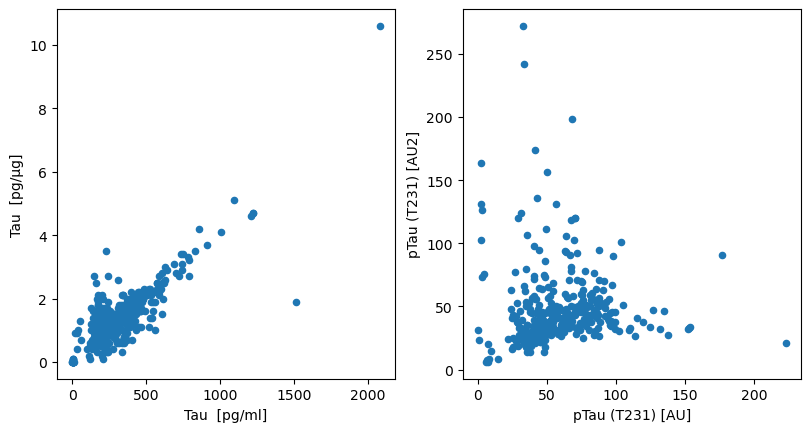

In [19]:
df = pd.read_excel(fpath, sheet_name='Tau phosphorylation')
fig, ax = plt.subplots(1, 2, figsize=(9.6, 4.8))
df.plot(kind='scatter', x='Tau  [pg/ml]', y='Tau  [pg/µg]', ax=ax[0])
df.plot(kind='scatter', x='pTau (T231) [AU]', y='pTau (T231) [AU2]', ax=ax[1])

In [20]:
%connect_info

{
  "shell_port": 53569,
  "iopub_port": 53570,
  "stdin_port": 53571,
  "control_port": 53573,
  "hb_port": 53572,
  "ip": "127.0.0.1",
  "key": "78c6d363-8ebdeb95a14c3ea0fadca073",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": "python3"
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-d8d40d23-56e5-451f-9dc8-50d2a720446d.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.
